 <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>


---
 <a href="http://www.upv.es/contenidos/CGANDIA/" target="_blank">
    <img width="1024", src="https://www.upv.es/perfiles/pas-pdi/imagenes/marca_UPV_principal_color300.png"></a>

#TFG @AUTHOR: [BERKAY SULEYMAN DIK](https://github.com/berkod-ai)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Sun Aug 27 15:01:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/gdrive/MyDrive/TFG

/content/gdrive/MyDrive/TFG


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/gdrive/MyDrive/TFG


## Install YOLOv8


YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
%cd {HOME}/YOLOv8

/content/gdrive/MyDrive/TFG/YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


100%|██████████| 104k/104k [00:00<00:00, 53.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 111.5ms
Speed: 2.2ms preprocess, 111.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
#!mkdir {HOME}/datasets
%cd {HOME}/YOLOv8/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="aiqnl80uq2Vjbz5i2YM7")
project = rf.workspace("berkod-ai").project("mp-d2")
dataset = project.version(11).download("yolov8")

/content/gdrive/MyDrive/TFG/YOLOv8/datasets
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to mp--d2-11 in yolov8:: 100%|██████████| 3070/3070 [00:18<00:00, 167.78it/s]


In [ ]:
%cd {HOME}/YOLOv8

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=90 imgsz=640 plots=True device=0 cache=True

/content/gdrive/MyDrive/TFG/YOLOv8
New https://pypi.org/project/ultralytics/8.0.162 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/data.yaml, epochs=90, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=N

In [ ]:
!yolo task=detect mode=train resume model=./runs/detect/train2/weights/last.pt data=./datasets/mp--d2-11/data.yaml/data.yaml epochs=90 imgsz=640 plots=True device=0 cache=True

New https://pypi.org/project/ultralytics/8.0.163 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=runs/detect/train2/weights/last.pt, data=/content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/data.yaml, epochs=90, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visual

In [ ]:
!ls {HOME}/YOLOv8/runs/detect/train2/

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1692974958.87c6ee101226.2316.0  train_batch6720.jpg
events.out.tfevents.1693048845.4f90b856796c.2000.0  train_batch6721.jpg
F1_curve.png					    train_batch6722.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights


/content/gdrive/MyDrive/TFG


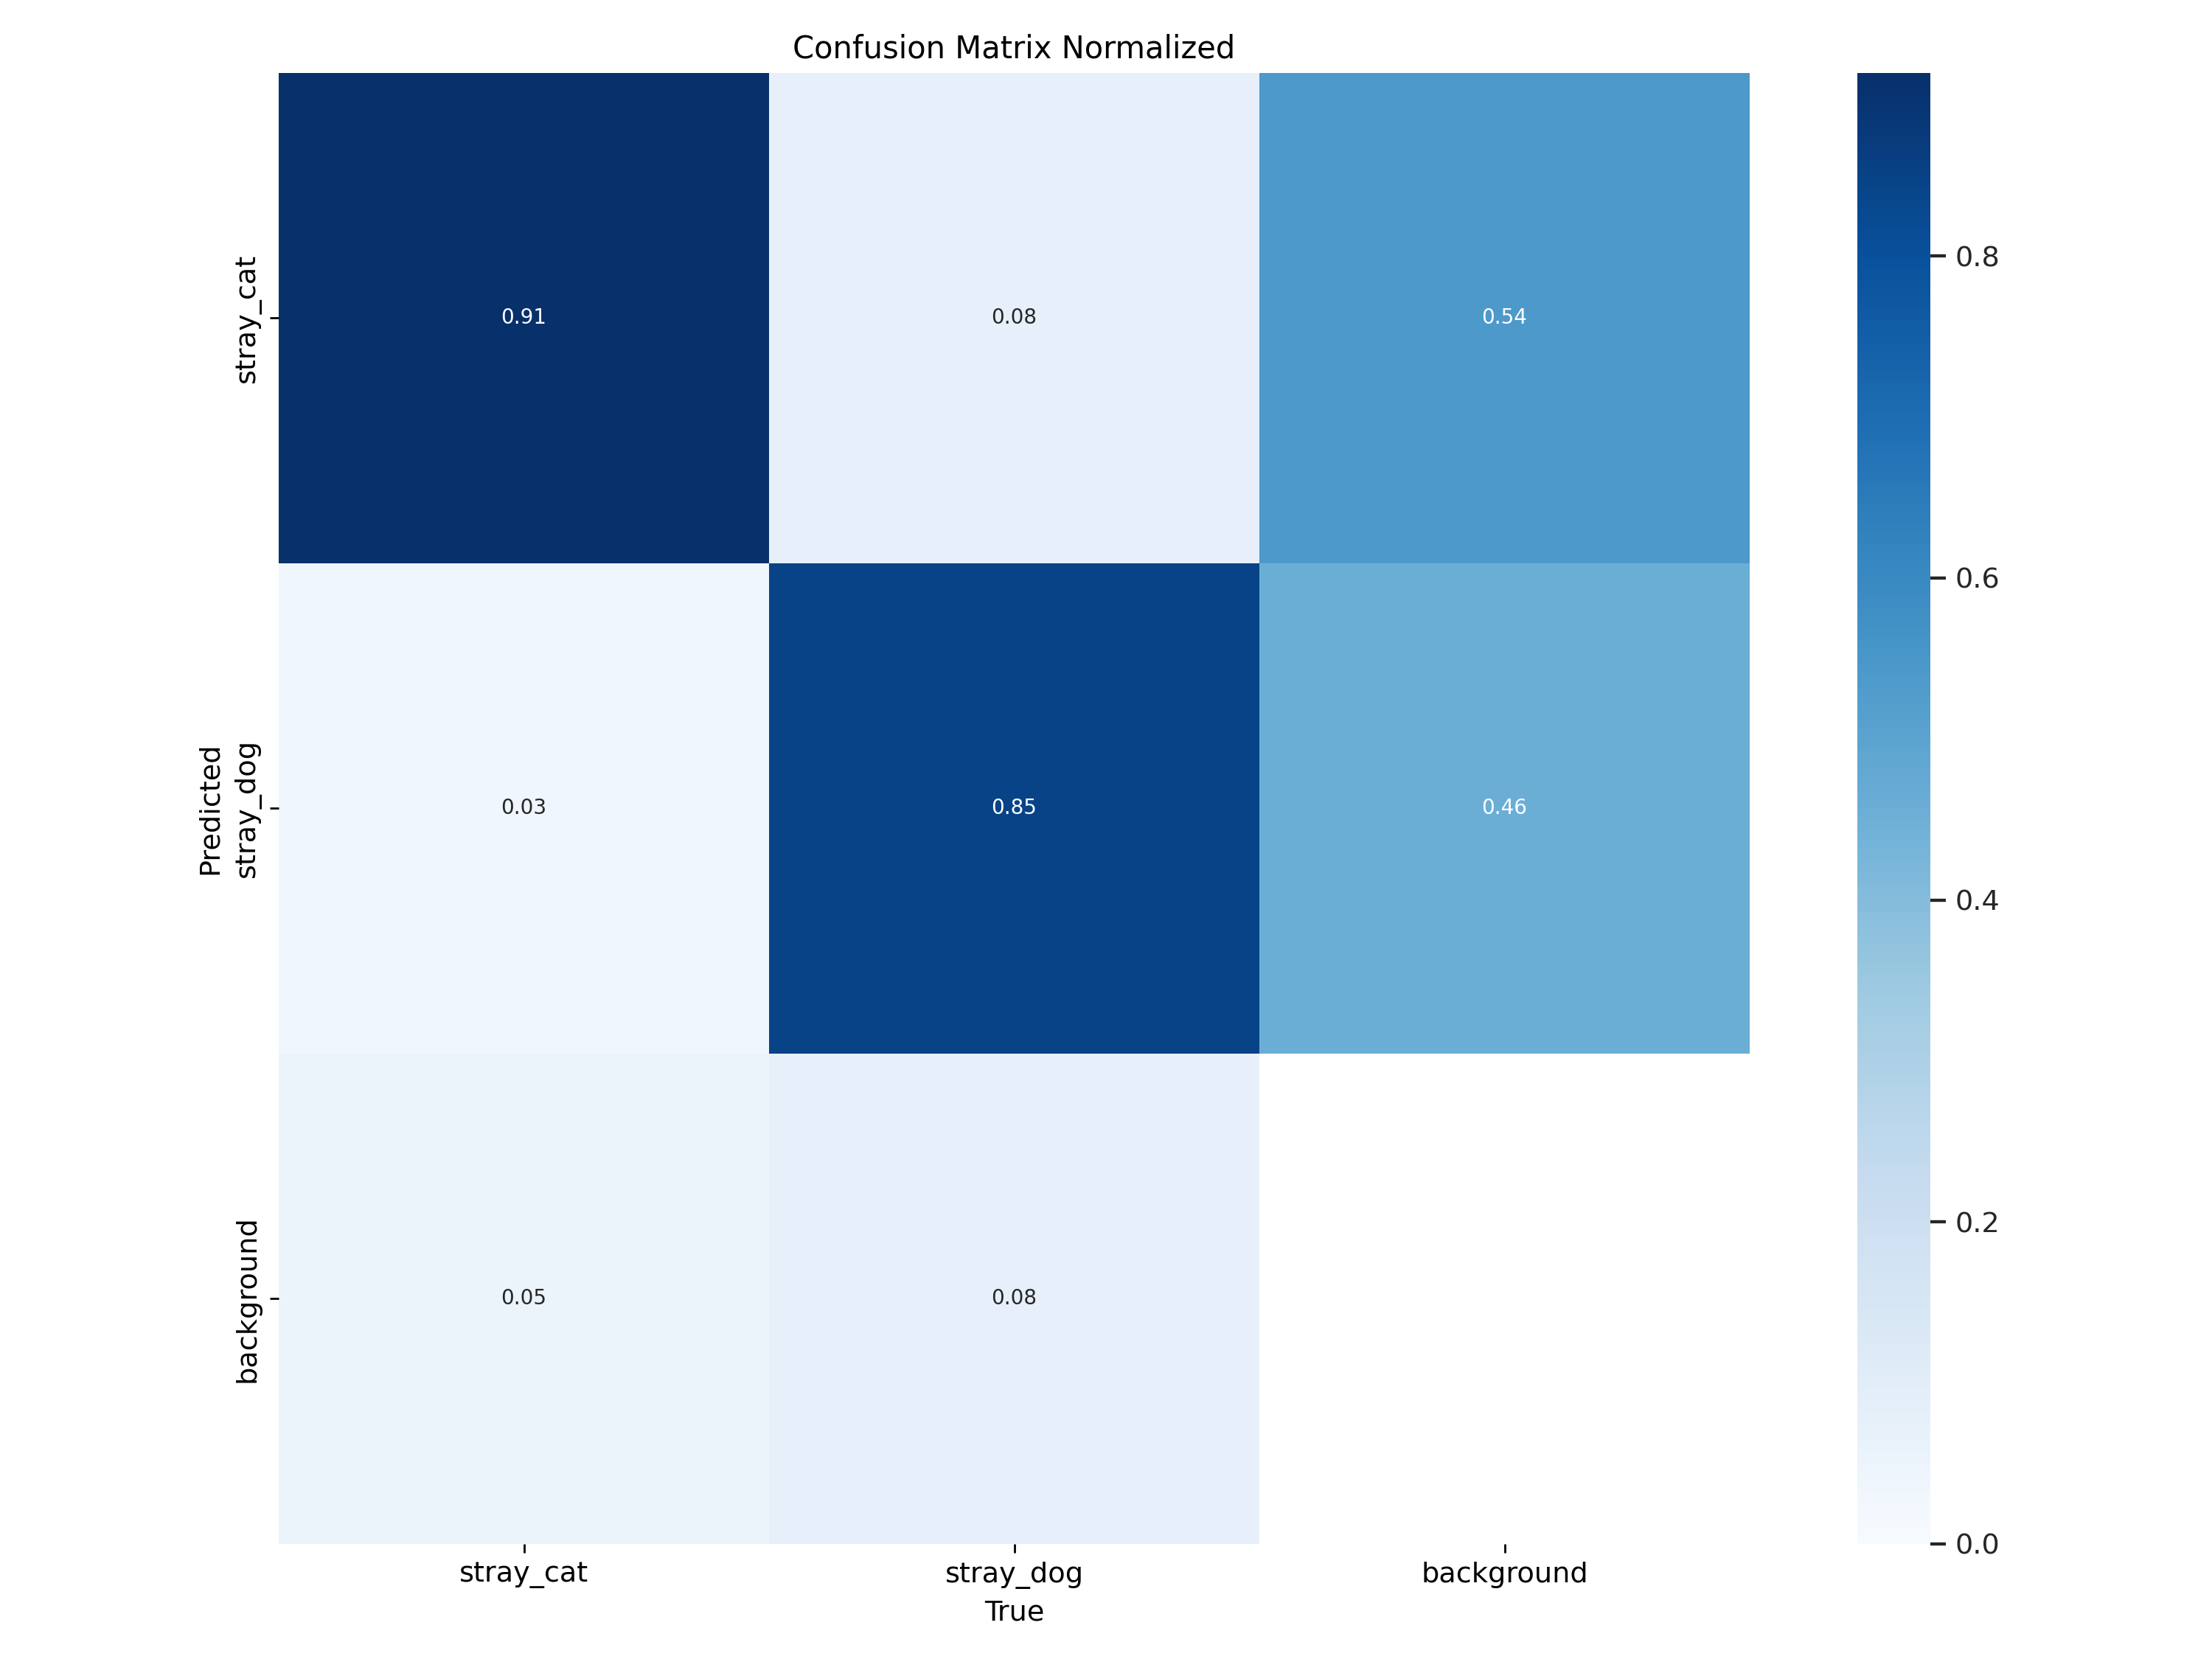

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/YOLOv8/runs/detect/train2/confusion_matrix_normalized.png', width=600)

/content/gdrive/MyDrive/TFG


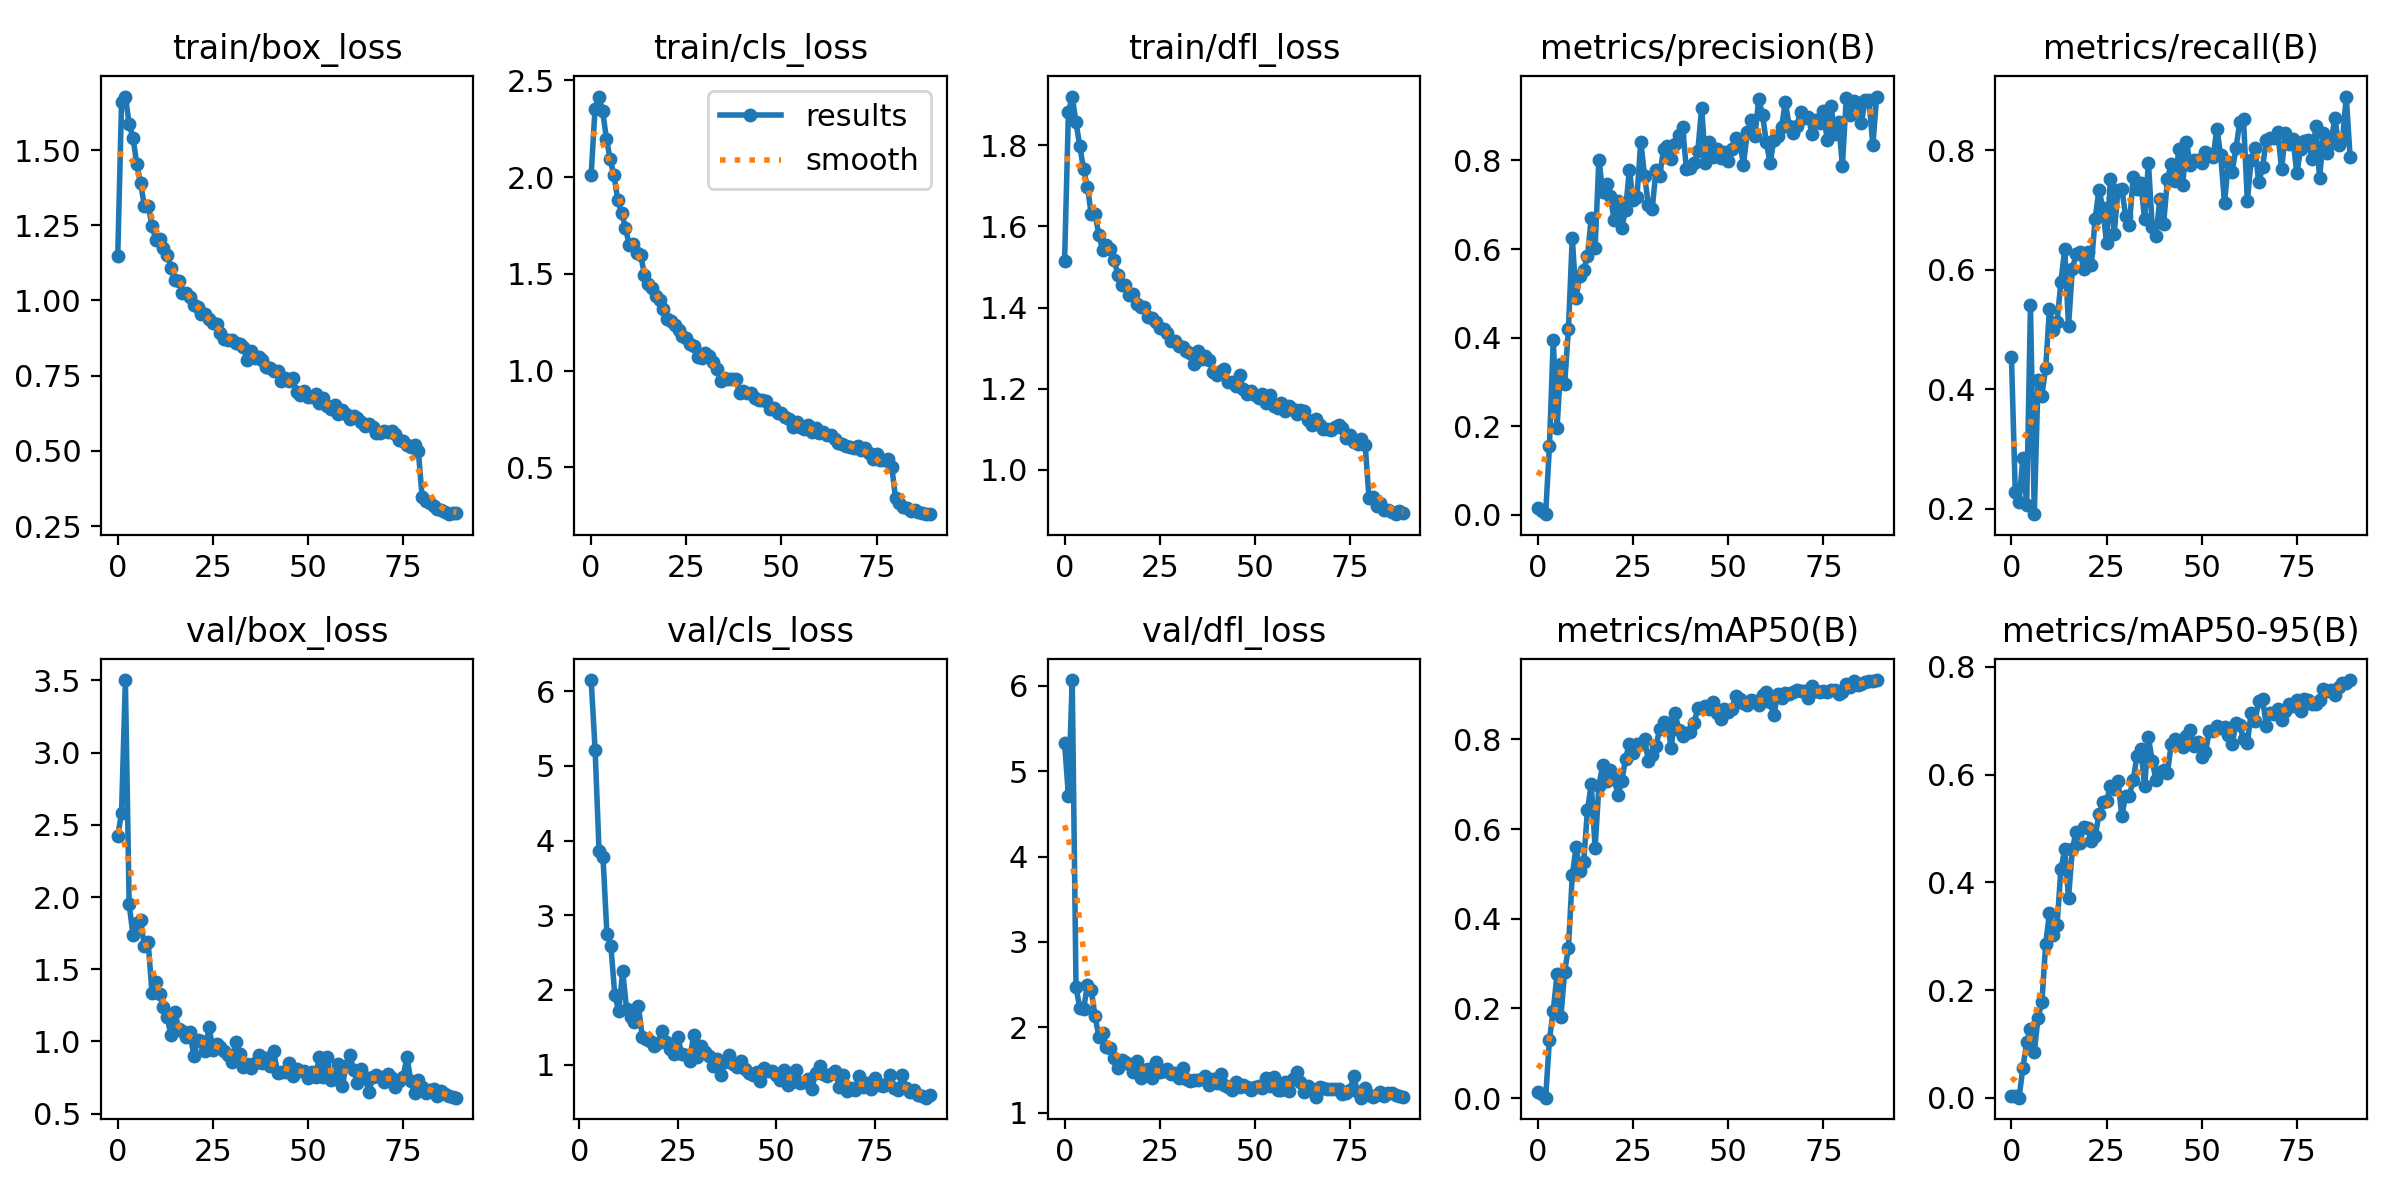

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/YOLOv8/runs/detect/train2/results.png', width=600)

/content/gdrive/MyDrive/TFG


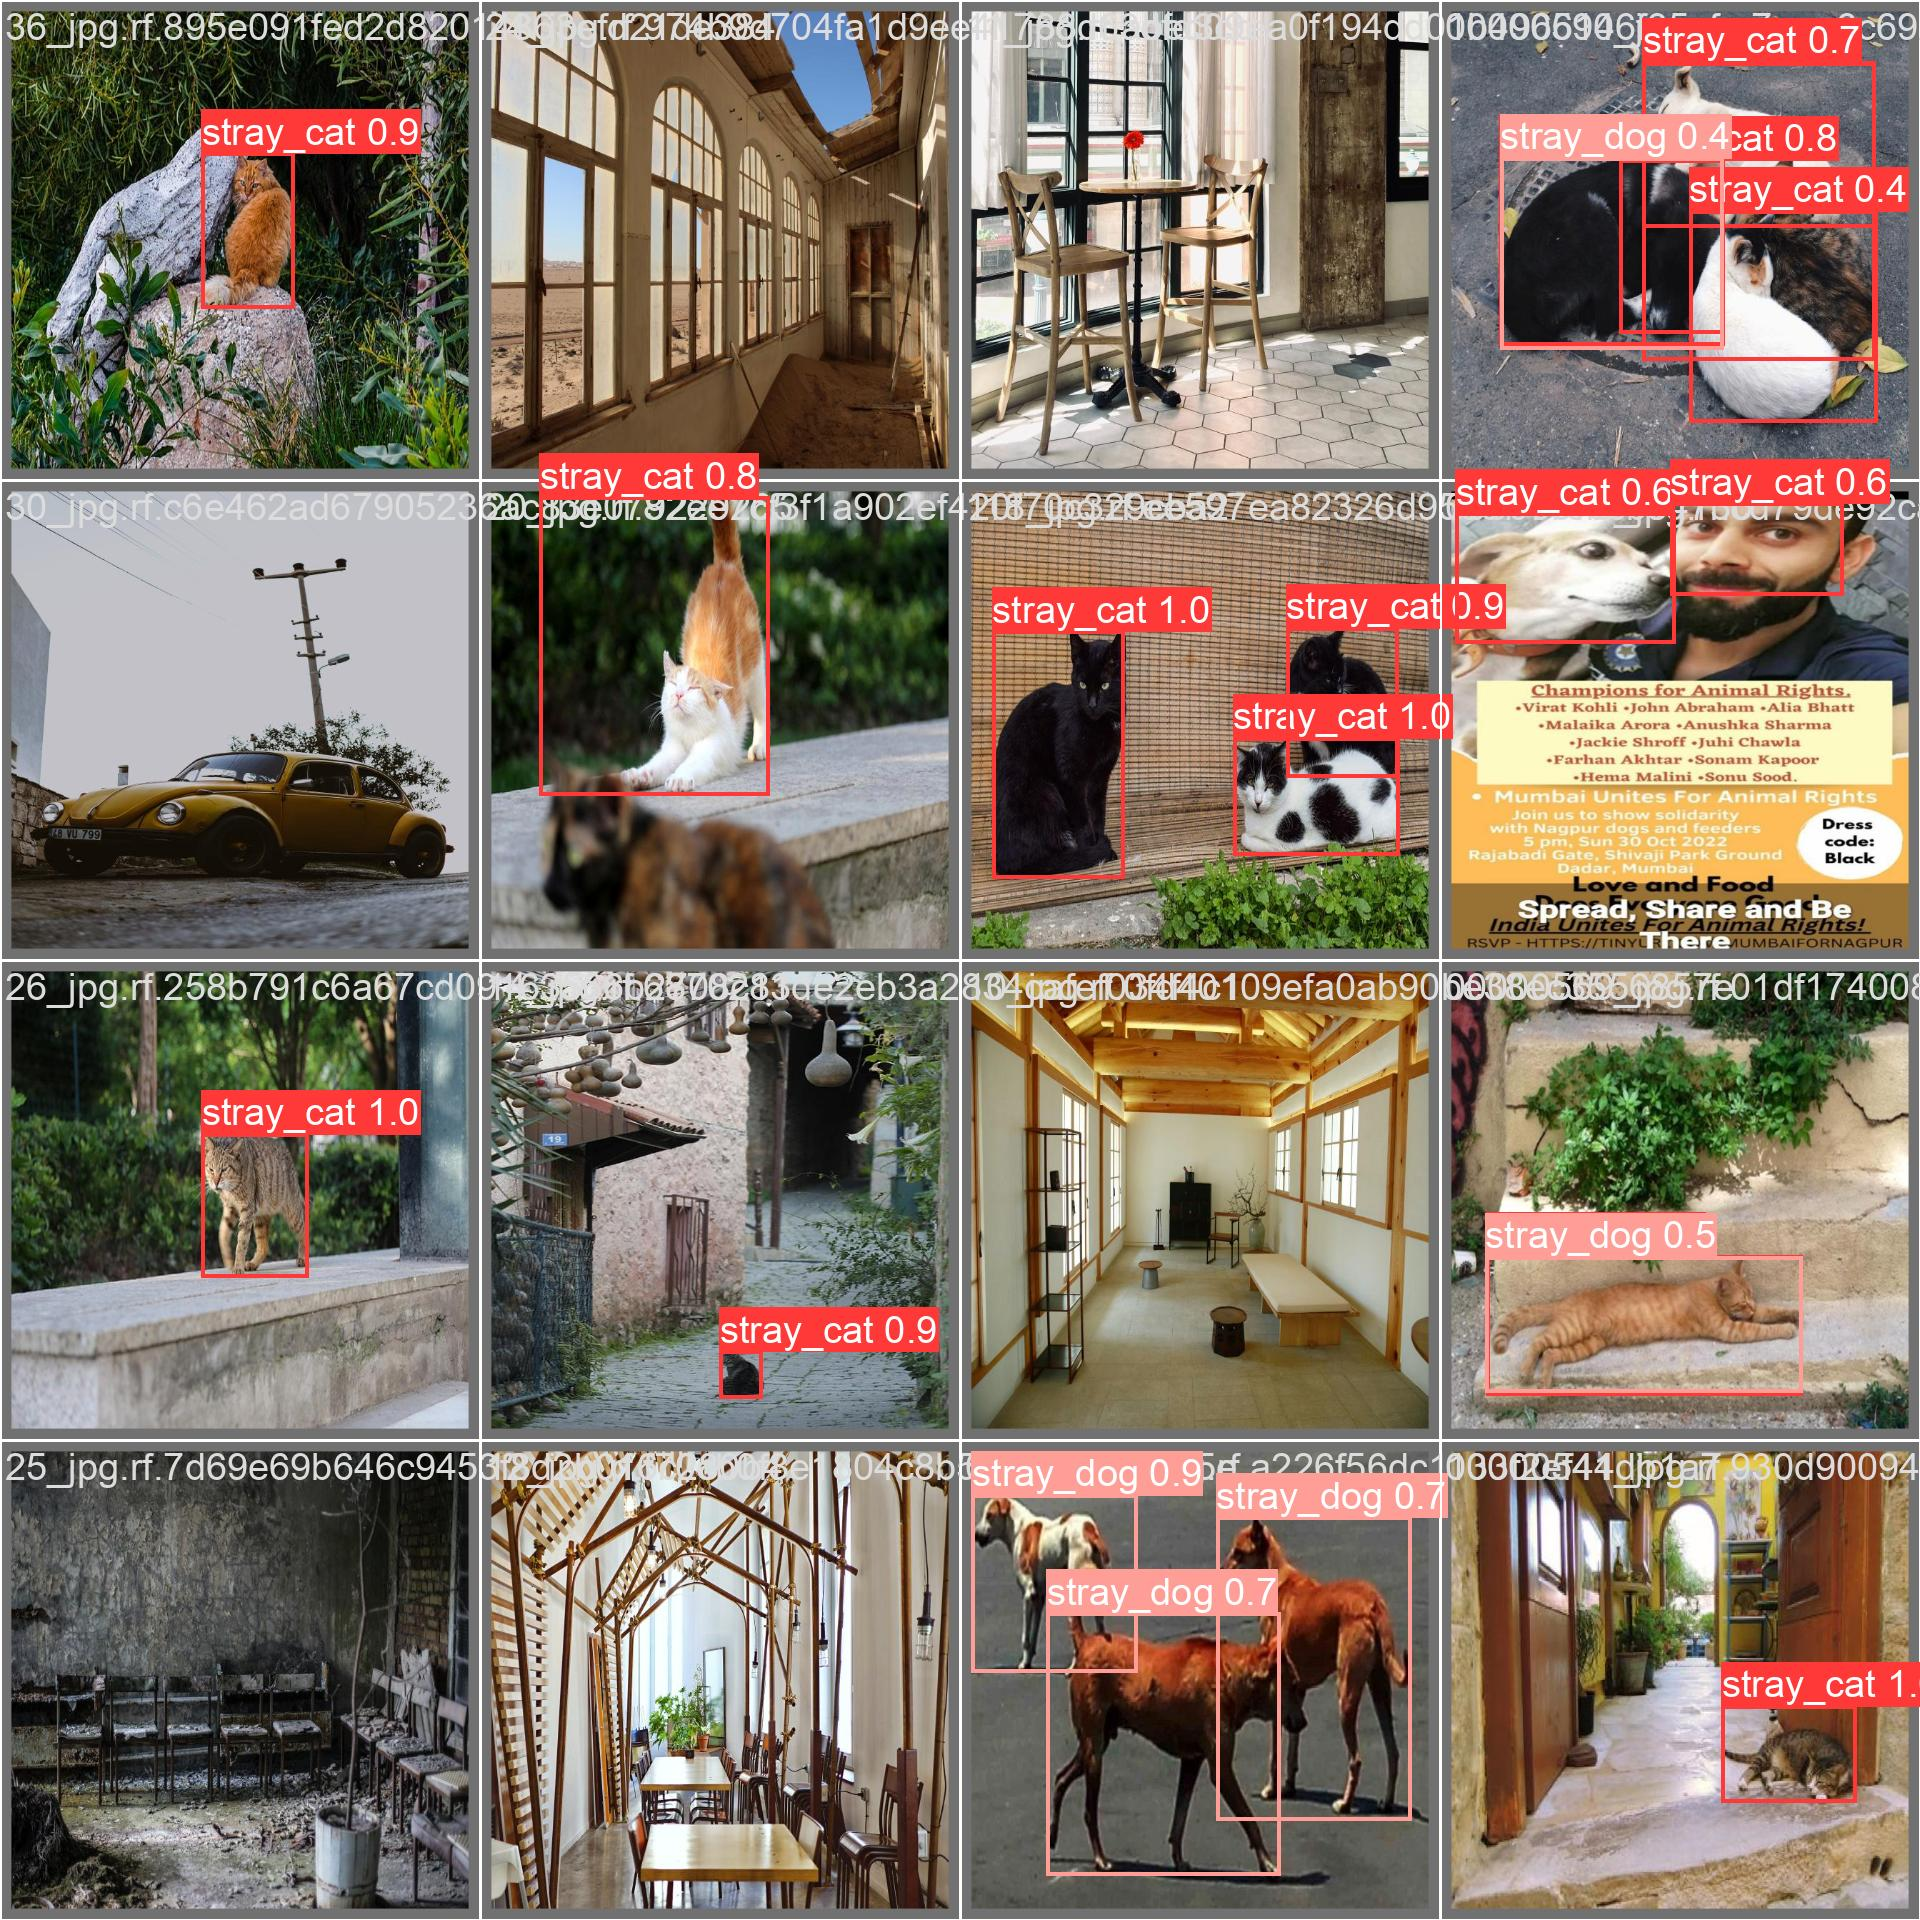

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/YOLOv8/runs/detect/train2/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}/YOLOv8
!yolo task=detect mode=val model=./runs/detect/train2/weights/best.pt data=/content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/data.yaml


/content/gdrive/MyDrive/TFG/YOLOv8
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients
val: Scanning /content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/valid/labels.cache... 99 images, 8 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:07<00:00,  1.01s/it]
                   all         99        124      0.944      0.789      0.932      0.777
             stray_cat         99         58      0.928      0.828      0.955      0.782
             stray_dog         99         66      0.961       0.75      0.909      0.772
Speed: 3.5ms preprocess, 38.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/val3


## Inference with Custom Model

In [ ]:
%cd {HOME}/YOLOv8
!yolo task=detect mode=predict model=./runs/detect/train2/weights/best.pt conf=0.35 source=/content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/test/images save=True

/content/gdrive/MyDrive/TFG/YOLOv8
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients

image 1/91 /content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/test/images/00000036_jpg.rf.8cbc80aa6bd27a59aa52d66d53ef9282.jpg: 640x640 1 stray_cat, 63.0ms
image 2/91 /content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/test/images/00000047_jpg.rf.de03eeae93ae22c2019393eb5e6e4240.jpg: 640x640 1 stray_cat, 63.0ms
image 3/91 /content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/test/images/00000073_jpg.rf.56168c093d6ca037054d6b100e585cc6.jpg: 640x640 1 stray_cat, 62.9ms
image 4/91 /content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/test/images/00000108_jpg.rf.aeb408831b00823b951e4f9060012451.jpg: 640x640 1 stray_cat, 62.9ms
image 5/91 /content/gdrive/MyDrive/TFG/YOLOv8/datasets/mp--d2-11/test/images/00000129_jpg.rf.7e8c96a92d222fed458815d4c2947589.jpg: 640x640 1 stray_cat, 63.0ms
image 6/91 /c

**NOTE:** Let's take a look at few results.

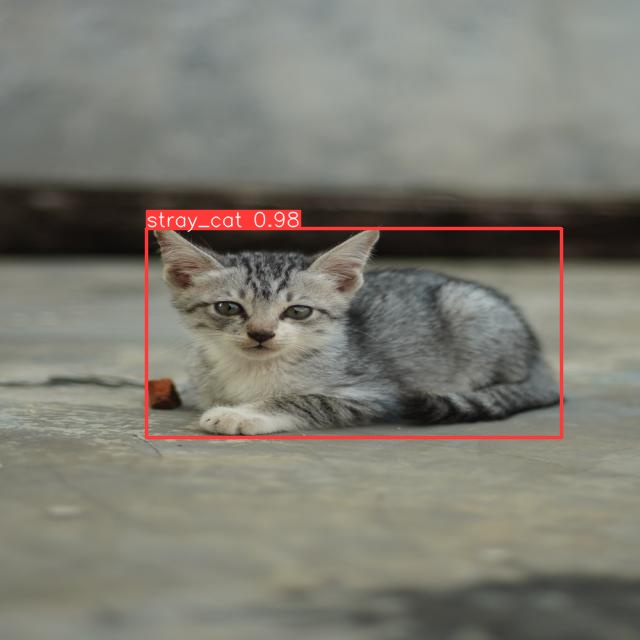

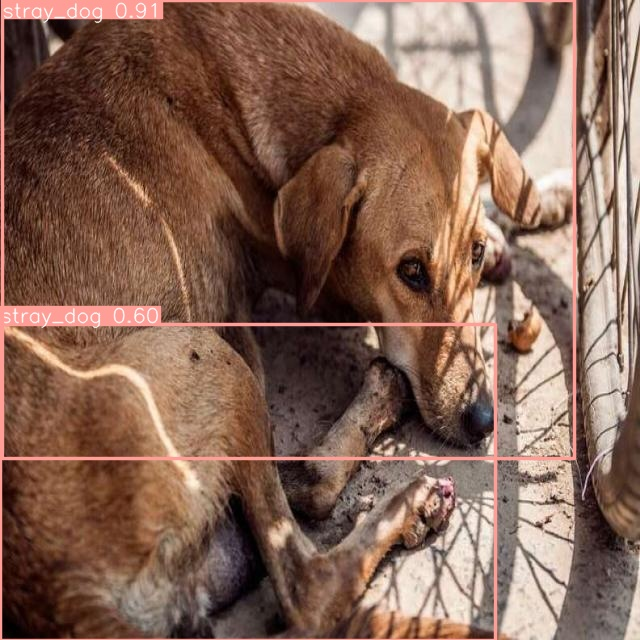

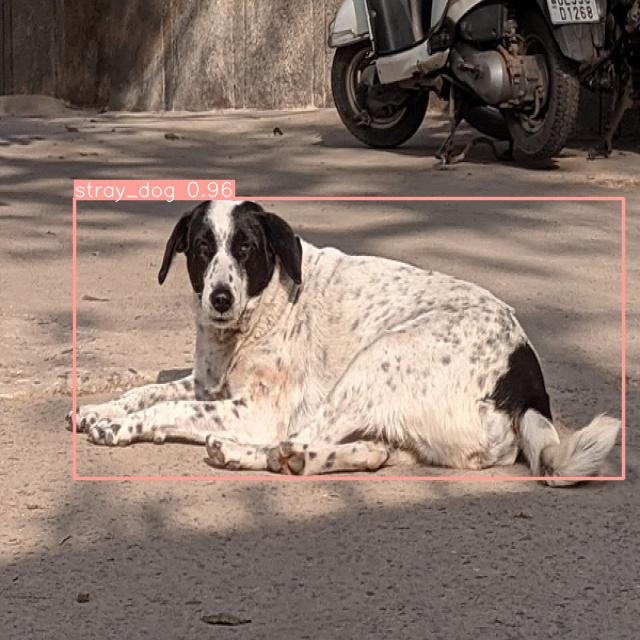

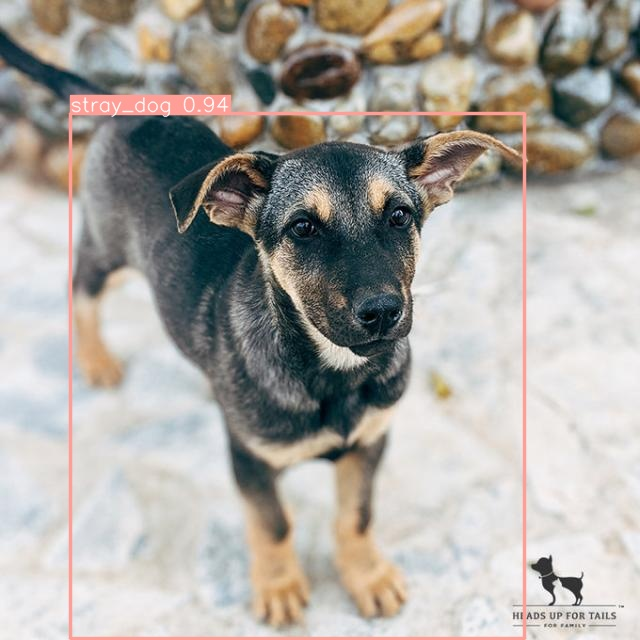

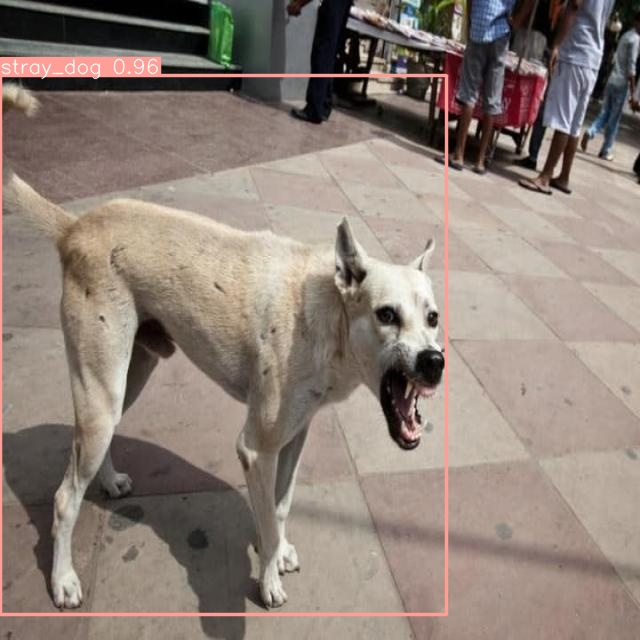

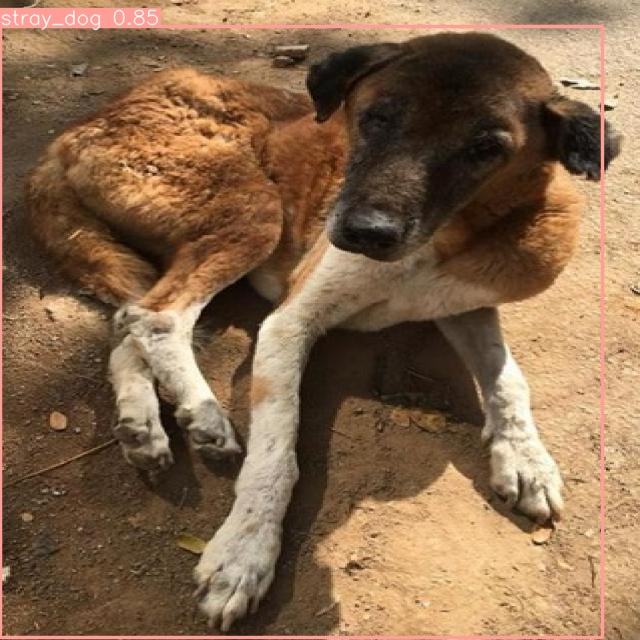

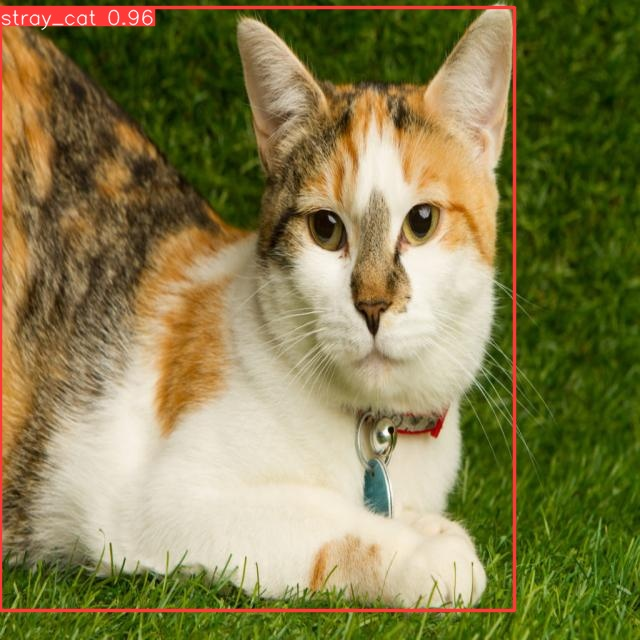

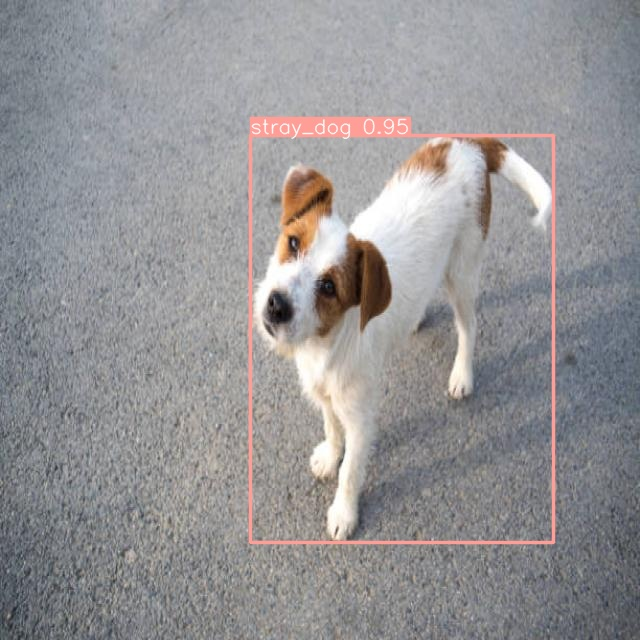

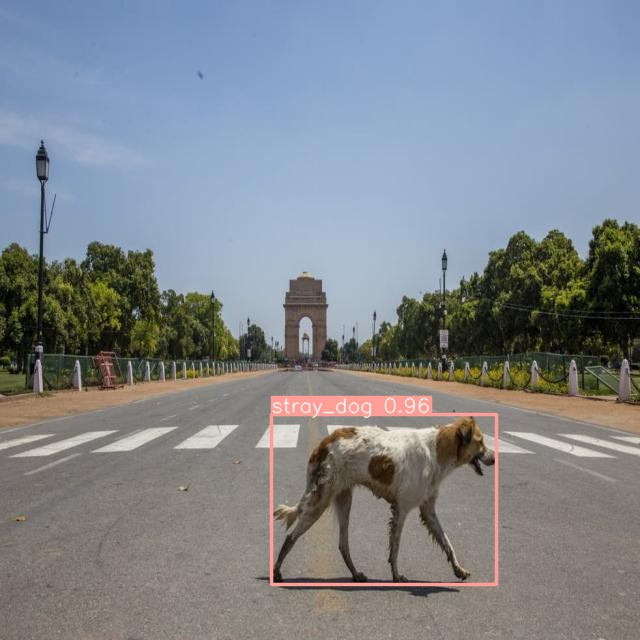

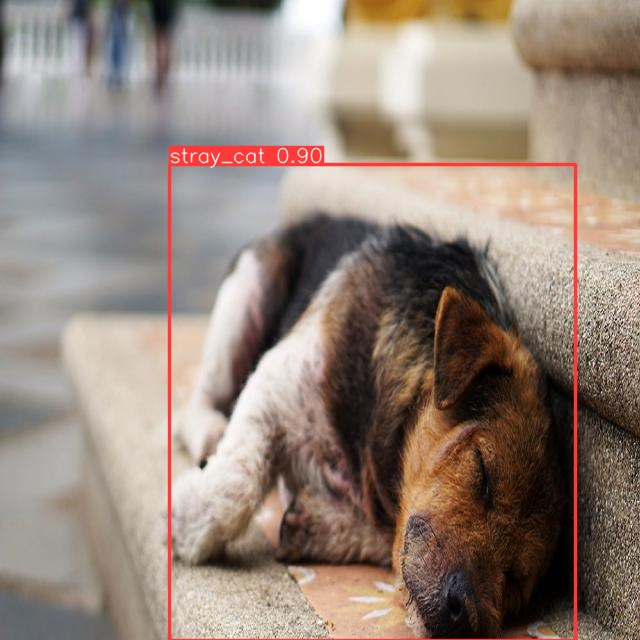

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/YOLOv8/runs/detect/predict_train2_test-images/*.jpg')[20:30]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/YOLOv8/runs/detect/train2/weights/best.pt conf=0.35 source=./testing/test10.jpg save=True

/content/gdrive/MyDrive/TFG
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients

image 1/1 /content/gdrive/MyDrive/TFG/testing/test10.jpg: 640x512 1 stray_dog, 67.6ms
Speed: 3.5ms preprocess, 67.6ms inference, 107.7ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.35 source={HOME}/testing/stray_cats3.mp4 save=True

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: line 1: yolo: command not found


# 4. Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)             | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`                                     |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`                                    |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`                                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [ncnn](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |


In [ ]:
!yolo export model=yolov8l.pt format=torchscript